In [ ]:
## Run to install required dependencies
# pip install -q -r requirements.txt

# pip -q install tensorflow
# pip -q install disutils

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_dark"

import librosa
from glob import glob
from IPython.display import Audio

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

import os

# Load Data

**File Location**: Dataset/Actor_01/03-01-01-01-01-01-01.wav 

**File**: `03-01-01-01-01-01-01.wav`

| Component             | Description            |
|-----------------------|------------------------|
| 03                    | Modality               |
| 01                    | Vocal Channel          |
| 01                    | Emotion                |
| 01                    | Emotional Intensity    |
| 01                    | Statement              |
| 01                    | Repetition             |
| 01                    | Actor                  |

In [2]:
# # for colab connect google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Extract the emotion ids from the file for each actors
path = 'Dataset'

actors_list = os.listdir(path=path) # use sorted function to store data in order
# Initialize emotion and file_path lists
emotion_id = []
file_path = []

# Iterate through the list of actor folders
for i in actors_list:
    actor_path = os.path.join(path, i) 

    # List all files in the actor folder
    if os.path.isdir(actor_path):
        for a in os.listdir(actor_path):
            # Split the filename to extract emotion
            part = a.split('.')[0].split('-')
            emotion_id.append(int(part[2]))  # part[2] holds the emotion ID
            file_path.append(os.path.join(actor_path, a))

# Print number of emotion ids and file location
print(f"Total number of files: {len(file_path)}")
print(f"Total number of emotion_ids: {len(emotion_id)}")

# Create DataFrame containing emotion-ID and file path
df = pd.DataFrame({
    'emotion_id': emotion_id,
    'file_path': file_path
})

# show the DataFrame
df.head()

Total number of files: 610
Total number of emotion_ids: 610


,emotion_id,file_path
0,3,Dataset/Actor_10/03-01-03-02-02-02-10.wav
1,3,Dataset/Actor_10/03-01-03-01-01-02-10.wav
2,2,Dataset/Actor_10/03-01-02-02-01-01-10.wav
3,2,Dataset/Actor_10/03-01-02-01-02-01-10.wav
4,1,Dataset/Actor_10/03-01-01-01-02-02-10.wav


In [4]:
# Map the emotion_id to meaningfull emotions
df['emotion'] = df['emotion_id'].replace({
    1: 'neutral',
    2: 'calm',
    3: 'happy',
    4: 'sad',
    5: 'angry',
    6: 'fearful',
    7: 'disgust',
    8: 'surprised'
})

# rearange columns
df = df[['emotion_id', 'emotion', 'file_path']]
df.head()

,emotion_id,emotion,file_path
0,3,happy,Dataset/Actor_10/03-01-03-02-02-02-10.wav
1,3,happy,Dataset/Actor_10/03-01-03-01-01-02-10.wav
2,2,calm,Dataset/Actor_10/03-01-02-02-01-01-10.wav
3,2,calm,Dataset/Actor_10/03-01-02-01-02-01-10.wav
4,1,neutral,Dataset/Actor_10/03-01-01-01-02-02-10.wav


In [5]:
# Visulize emotions
fig = px.histogram(df, x='emotion', title='Count of Emotions')
fig.show()

In [6]:
# load first audio file from dataframe
audio_data, sr = librosa.load(path=df['file_path'][0]) # returns audio samples as 1D array and sample rate(Hz)

# Print audio data and sample rate
print(f"Audio Data: {audio_data}")
print(f"Sample Rate: {sr} Hz \n")

# Play the audio
Audio(audio_data, rate=sr)

Audio Data: [-9.7167394e-06 -3.0528208e-05 -7.0623619e-06 ...  1.5229465e-05
  1.8873892e-05  1.8556451e-05]
Sample Rate: 22050 Hz 



## Visualize the Audio Data

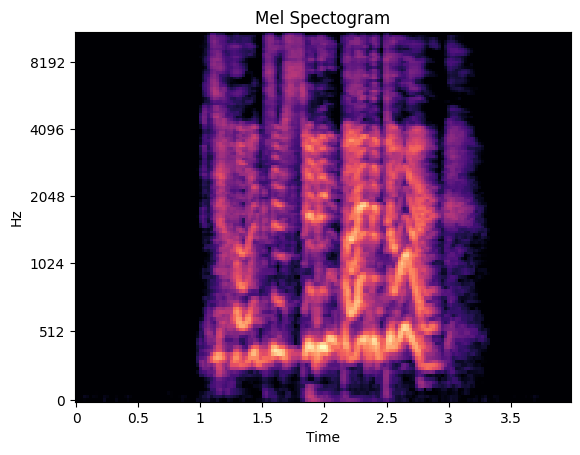

In [7]:
# mel spectogram
melspec = librosa.feature.melspectrogram(y=audio_data, sr=sr)
librosa.display.specshow(librosa.power_to_db(melspec, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar
plt.title('Mel Spectogram')
plt.show()

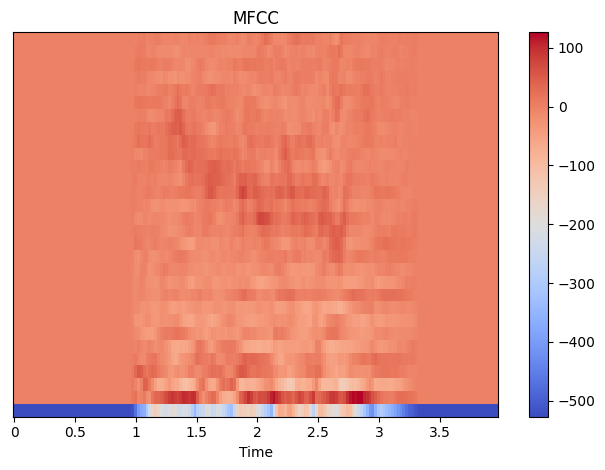

In [8]:
# MFCC
mfcc = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=30)
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [9]:
# create function to diplay the waveplot
def plot_waveplot(data, sr, emotion):
    librosa.display.waveshow(data, sr=sr)
    plt.title(f'Waveplot for {emotion}')
    plt.show()

# plot mel spectogram
def plot_spectogram(data, sr, emotion):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.title(f'Spectogram for {emotion}')
    plt.show()

In [13]:
emotion_list = df['emotion'].unique()
print(emotion_list)

['happy' 'calm' 'neutral' 'fearful' 'angry' 'sad' 'disgust' 'surprised']


In [14]:
# Choose the emotion
emotion = emotion_list[2]

/var/folders/57/kxv96qw15fgbnvfp982zqnhm0000gp/T/ipykernel_31124/3115636411.py:20: UserWarning:

amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.



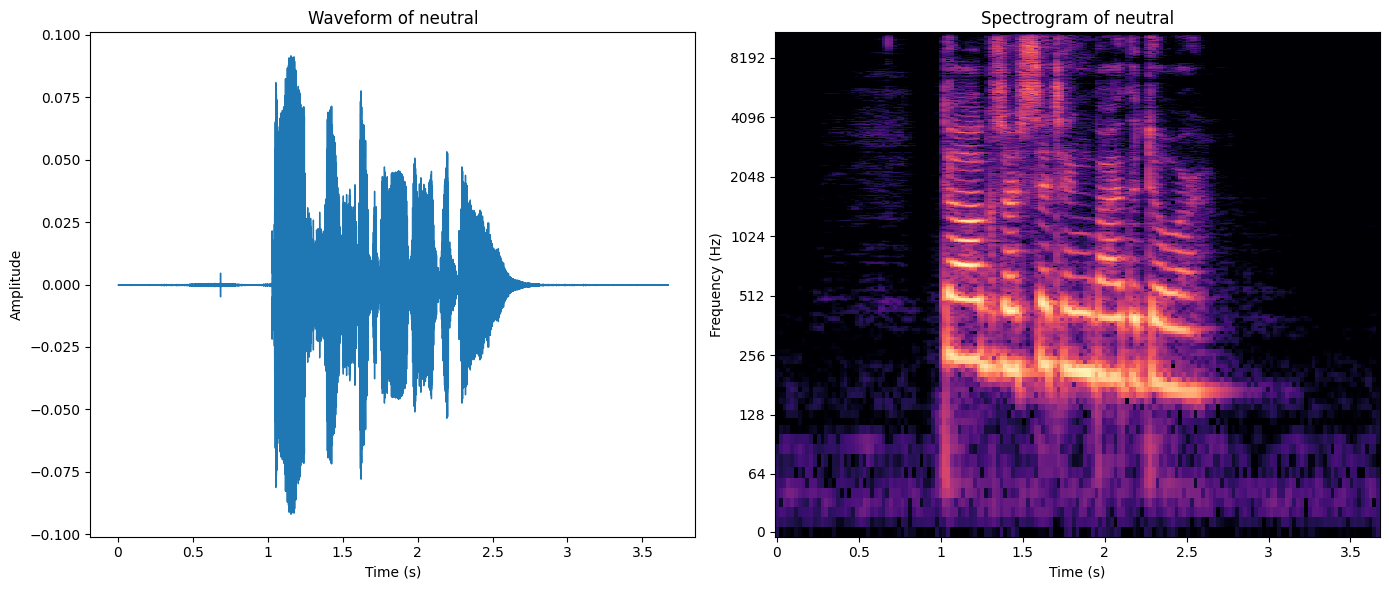

In [15]:
# Visulize emotion

# Get all files that contains choosen emotion
df_sample = df[df['emotion'] == emotion]

# select the first row data
df_sample = df_sample.iloc[0]

# load the audio file
audio_data, sr = librosa.load(path=df_sample['file_path'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Plot the waveform on the left
librosa.display.waveshow(audio_data, sr=sr, ax=axes[0])
axes[0].set_title(f"Waveform of {emotion}")
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Amplitude")

# Plot the spectrogram on the right
D = librosa.amplitude_to_db(librosa.stft(audio_data), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', ax=axes[1])
axes[1].set_title(f"Spectrogram of {emotion}")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Frequency (Hz)")

# Show the plots
plt.tight_layout()
plt.show()

# Audio
Audio(audio_data, rate=sr)

## Data Augmentation

In [16]:
# Add noise to the audio signal
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data_noisy = data + noise_amp * np.random.normal(size=data.shape[0])
    return data_noisy

# Stretch the audio signal (speed up or slow down)
def stretch(data, rate=0.8):
    # if rate < 1 => slow down, if rate > 1 => speed up
    return librosa.effects.time_stretch(data, rate=rate)

# Shift the audio signal
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)

# Change the pitch of the audio signal
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

In [17]:
path1 = np.array(df['file_path'])[1]
audio_data1, sr1 = librosa.load(path1)

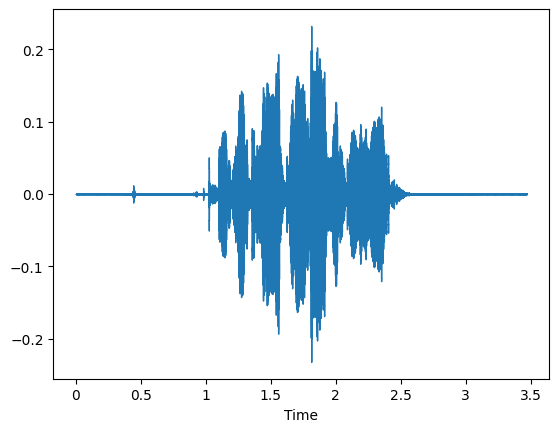

In [18]:
# Original audio
librosa.display.waveshow(y=audio_data1, sr=sr1)

# Audio
Audio(audio_data1, rate=sr1)

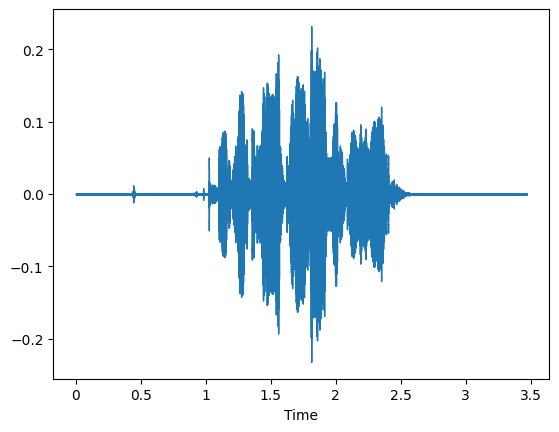

In [19]:
# add noise
noise_data = noise(audio_data1)

# Display
librosa.display.waveshow(y=noise_data, sr=sr1)

# Audio
Audio(noise_data, rate=sr1)

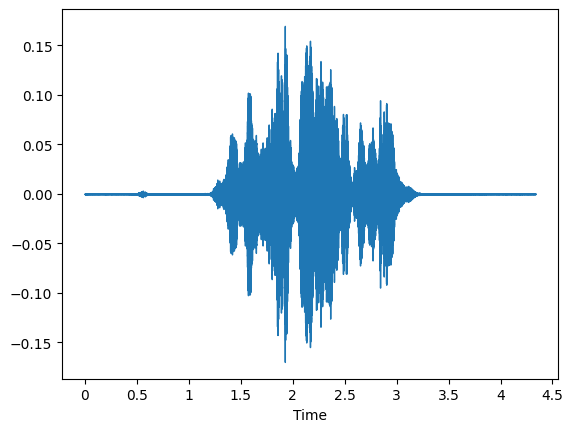

In [20]:
# Streching Audio
streched_data = stretch(audio_data1)

# Display
librosa.display.waveshow(y=streched_data, sr=sr1)

# Audio
Audio(streched_data, rate=sr1)

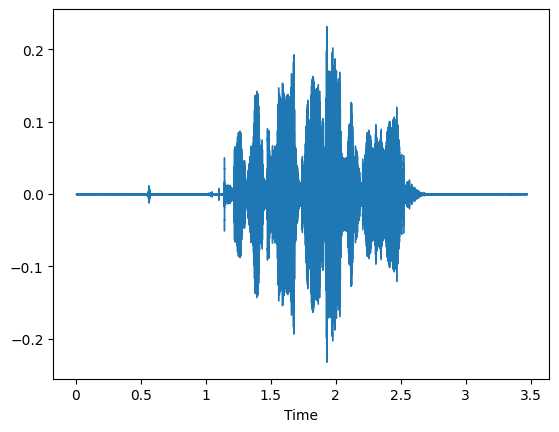

In [22]:
# shifting audio
shifted_data = shift(audio_data1)

# Display
librosa.display.waveshow(y=shifted_data, sr=sr1)

# Audio
Audio(shifted_data, rate=sr1)

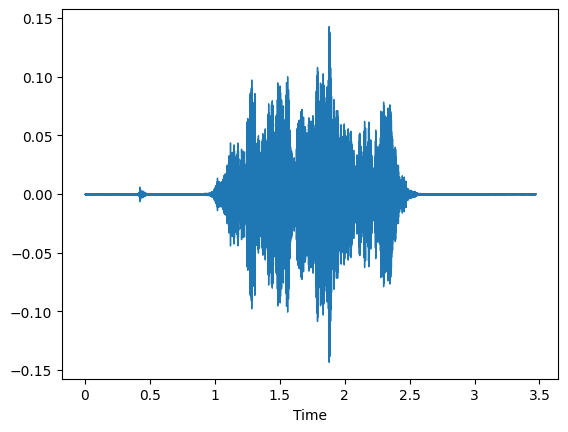

In [21]:
# Augmenting with Pitch
pitched_data = pitch(audio_data1, sr1, 0.8)

# Display
librosa.display.waveshow(y=pitched_data, sr=sr1)

# Audio
Audio(pitched_data, rate=sr1)

## Feature Extraction

In [22]:
# Feature Extraction from audio data
# Time domain features: RMS Energy
# Perceptual Features: Chroma stft, MFCC, mel spectogram

In [23]:
df.head()

,emotion_id,emotion,file_path
0,3,happy,Dataset/Actor_10/03-01-03-02-02-02-10.wav
1,3,happy,Dataset/Actor_10/03-01-03-01-01-02-10.wav
2,2,calm,Dataset/Actor_10/03-01-02-02-01-01-10.wav
3,2,calm,Dataset/Actor_10/03-01-02-01-02-01-10.wav
4,1,neutral,Dataset/Actor_10/03-01-01-01-02-02-10.wav


In [ ]:
# Create fuction to extract data

def extract_features(data, sr):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))

    # Chroma STFT
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
    result = np.hstack((result, chroma_stft))

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr).T, axis=0)
    result = np.hstack((result, mfcc))

    # RMS Energy
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))

    # Mel Spectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sr).T, axis=0)
    result = np.hstack((result, mel))

    return result


In [ ]:
def fetch_features(path):
  audio_data, sr = librosa.load(path, duration=2.5, offset=0.6)

# without augmenation
  res1 = extract_features(audio_data, sr)
  result = np.array(res1)

# Add Noise
  noisy_data = noise(audio_data)
  res2 =  extract_features(noisy_data, sr)
  result = np.vstack((result, res2))

#  stretch audio and then pitch
  stretched_data = stretch(audio_data)
  pitched_data = pitch(stretched_data, sr)
  res3 = extract_features(pitched_data, sr)
  result = np.vstack((result, res3))

  return result

## Build Model

In [26]:
X, y = [],[]
for path ,emotion in zip(df['file_path'],df['emotion']):
  feature = fetch_features(path)
  for i in feature:
    X.append(i)
    y.append(emotion)

X = pd.DataFrame(X)
y = pd.DataFrame(y, columns=['labels'])

In [27]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
0,0.155359,0.448709,0.488297,0.481946,0.474007,0.487960,0.496776,0.511894,0.559882,0.657276,...,0.007244,0.005380,0.003955,0.003311,0.003717,0.004554,0.005453,0.004549,0.002396,0.000245
1,0.250751,0.524145,0.545447,0.542163,0.569737,0.616163,0.579405,0.574650,0.614045,0.675548,...,0.017333,0.015566,0.013440,0.012118,0.013037,0.014580,0.014706,0.014124,0.011585,0.009251
2,0.163274,0.482462,0.435391,0.485318,0.479375,0.467300,0.487786,0.486451,0.499996,0.564138,...,0.001204,0.001188,0.001201,0.000856,0.000800,0.000709,0.000825,0.001155,0.000697,0.000057
3,0.108444,0.555001,0.555161,0.608867,0.654595,0.564439,0.500755,0.496273,0.560278,0.594170,...,0.000544,0.000768,0.000420,0.000581,0.000523,0.000590,0.000642,0.000590,0.000367,0.000022
4,0.242888,0.606165,0.650127,0.677840,0.774907,0.762761,0.655524,0.534492,0.513589,0.574495,...,0.000606,0.000827,0.000483,0.000651,0.000590,0.000673,0.000711,0.000655,0.000431,0.000090


In [28]:
y['labels']

0         happy
1         happy
2         happy
3         happy
4         happy
         ...   
1825       calm
1826       calm
1827    neutral
1828    neutral
1829    neutral
Name: labels, Length: 1830, dtype: object

In [29]:
set(y['labels'])

{'angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised'}

In [30]:
# one hot encoder
encoder = OneHotEncoder()
y = encoder.fit_transform(np.array(y).reshape(-1, 1)).toarray()

In [31]:
# split data train test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [32]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(1372, 162) (458, 162)
(1372, 8) (458, 8)


In [33]:
# scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# reshape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(1372, 162, 1) (458, 162, 1)
(1372, 8) (458, 8)


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, Input
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [36]:
# Define the Sequential model
m1 = Sequential()

# Add the Input layer
m1.add(Input(shape=(X_train.shape[1], 1)))

# Add the rest of the layers
m1.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
m1.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

m1.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
m1.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

m1.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
m1.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
m1.add(Dropout(0.2))

m1.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
m1.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

m1.add(Flatten())
m1.add(Dense(32, activation='relu'))
m1.add(Dropout(0.3))

m1.add(Dense(8, activation='softmax'))

# Compile the model
m1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# Display the model summary
m1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 162, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 81, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 41, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 41, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 21, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        22,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 557,288 (2.13 MB)

 Trainable params: 557,288 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# ReduceLROnPlateau callback: 
# Dynamically reduces the learning rate when the monitored metric stops improving.
rlrp = ReduceLROnPlateau(
    monitor='loss', # The metric to monitor.
    factor=0.4, # The factor by which the learning rate is reduced.
    patience=2, # Number of epochs with no improvement before reducing the learning rate.
    min_lr=1e-8 # The minimum learning rate allowed.
)

# Training the model:
h1 = m1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, callbacks=[rlrp])


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - acc: 0.1606 - loss: 2.0829 - val_acc: 0.1878 - val_loss: 2.0022 - learning_rate: 0.0010
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 0.2068 - loss: 2.0153 - val_acc: 0.2380 - val_loss: 1.9951 - learning_rate: 0.0010
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - acc: 0.1896 - loss: 1.9797 - val_acc: 0.2817 - val_loss: 1.9228 - learning_rate: 0.0010
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 0.2722 - loss: 1.9340 - val_acc: 0.2751 - val_loss: 1.9205 - learning_rate: 0.0010
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - acc: 0.2677 - loss: 1.8992 - val_acc: 0.2882 - val_loss: 1.8692 - learning_rate: 0.0010
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - acc: 0.2820 - loss: 1.8353 - val_acc: 0.3581 - val_loss: 1.8130 - learning_rate: 0.0010
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - acc: 0.3054 - loss: 1.8234 - val_acc: 0.3231 - val_loss: 1.8142 - learning_rate: 0.0010
Epoch 8/50
43

In [38]:
# Create DataFrame
r1 = pd.DataFrame(h1.history) # A dictionary containing the loss, accuracy, and other metrics recorded during training.
r1['Epochs'] = h1.epoch # A list of epoch indices (0-based) corresponding to each row of metrics in `h1.history`.
r1.tail()

,acc,loss,val_acc,val_loss,learning_rate,Epochs
45,0.823615,0.530968,0.657205,1.165092,0.0010,45
46,0.857872,0.465906,0.670306,1.159716,0.0010,46
47,0.890671,0.334731,0.679039,1.259553,0.0004,47
48,0.908892,0.259738,0.687773,1.268328,0.0004,48
49,0.919825,0.238539,0.689956,1.237248,0.0004,49


In [39]:
fig = go.Figure()

# Train loss
fig.add_trace(go.Scatter(x=r1['Epochs'], y=r1['loss'], mode='lines', name='Train loss'))

# Test loss
fig.add_trace(go.Scatter(x=r1['Epochs'], y=r1['val_loss'], mode='lines', name='Test loss'))

# Update layout
fig.update_layout(
    title='Epochs vs Loss',
    xaxis_title='Epochs',
    yaxis_title='Loss',
)

In [40]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=r1['Epochs'], y=r1['acc'], name='Train Acc'))
fig.add_trace(go.Scatter(x=r1['Epochs'], y=r1['val_acc'], name='Test Acc'))

fig.update_layout(
    title = 'Epoch vs Acc',
    xaxis_title = 'Epochs',
    yaxis_title = 'Acc'
)